In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\jestu\OneDrive\Desktop\application_train.csv")

In [4]:
df.shape

(307511, 122)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [9]:
df['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [10]:
df[['SK_ID_CURR']].head()

,SK_ID_CURR
0,100002
1,100003
2,100004
3,100006
4,100007


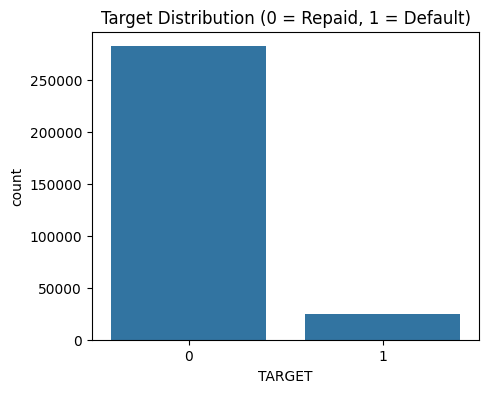

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='TARGET', data=df)
plt.title("Target Distribution (0 = Repaid, 1 = Default)")
plt.show()

In [12]:
key_cols = [
    'AMT_INCOME_TOTAL',   # customer income
    'AMT_CREDIT',         # loan amount
    'AMT_ANNUITY',        # yearly loan payment
    'DAYS_BIRTH',         # age (in days)
    'DAYS_EMPLOYED'       # employment length
]

df[key_cols].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED
count,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,-16036.995067,63815.045904
std,2.371231e+05,4.024908e+05,14493.737315,4363.988632,141275.766519
min,2.565000e+04,4.500000e+04,1615.500000,-25229.000000,-17912.000000
25%,1.125000e+05,2.700000e+05,16524.000000,-19682.000000,-2760.000000
50%,1.471500e+05,5.135310e+05,24903.000000,-15750.000000,-1213.000000
75%,2.025000e+05,8.086500e+05,34596.000000,-12413.000000,-289.000000
max,1.170000e+08,4.050000e+06,258025.500000,-7489.000000,365243.000000


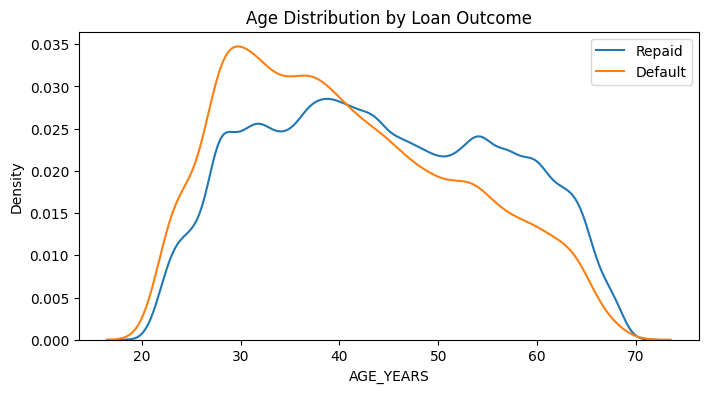

In [13]:
# Age Analysis
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365


plt.figure(figsize=(8,4))
sns.kdeplot(df[df['TARGET']==0]['AGE_YEARS'], label='Repaid')
sns.kdeplot(df[df['TARGET']==1]['AGE_YEARS'], label='Default')
plt.title("Age Distribution by Loan Outcome")
plt.legend()
plt.show()

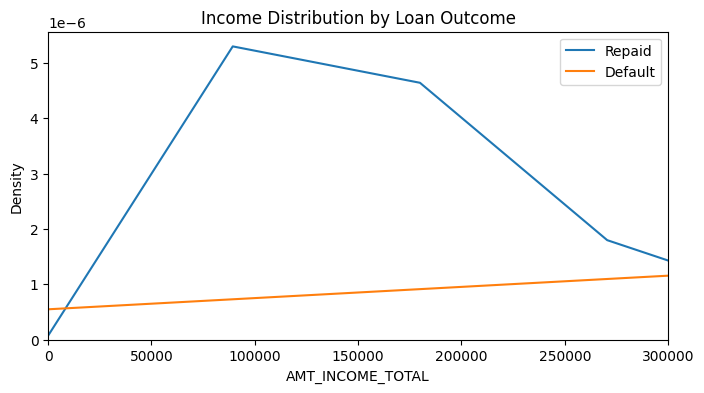

In [14]:
# Income Analysis

plt.figure(figsize=(8,4))
sns.kdeplot(df[df['TARGET']==0]['AMT_INCOME_TOTAL'], label='Repaid')
sns.kdeplot(df[df['TARGET']==1]['AMT_INCOME_TOTAL'], label='Default')
plt.xlim(0, 300000)  # cut extreme outliers for clarity
plt.title("Income Distribution by Loan Outcome")
plt.legend()
plt.show()

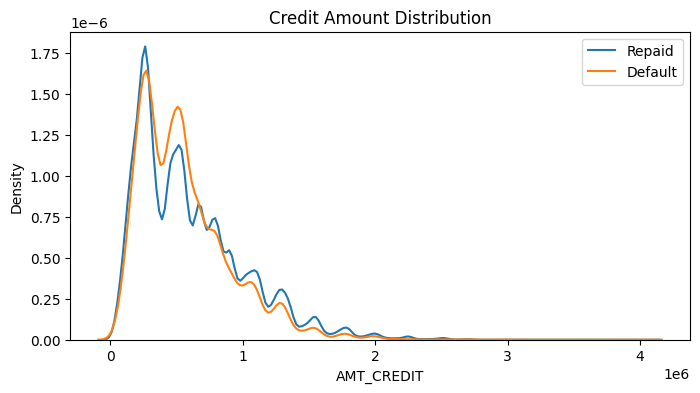

In [15]:
# Credit Amount Analysis
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['TARGET']==0]['AMT_CREDIT'], label='Repaid')
sns.kdeplot(df[df['TARGET']==1]['AMT_CREDIT'], label='Default')
plt.title("Credit Amount Distribution")
plt.legend()
plt.show()


In [16]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [17]:
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\806898358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


In [18]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(15)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_AVG             0.664978
dtype: float64

In [19]:
# corr = df.corr()['TARGET'].sort_values()
# corr.head(10), corr.tail(10)

corr = (df.select_dtypes(include='number').corr()['TARGET'].sort_values())
corr.head(10), corr.tail(10)


(EXT_SOURCE_3                 -0.178919
 EXT_SOURCE_2                 -0.160472
 EXT_SOURCE_1                 -0.155317
 AGE_YEARS                    -0.078239
 FLOORSMAX_AVG                -0.044003
 FLOORSMAX_MEDI               -0.043768
 FLOORSMAX_MODE               -0.043226
 AMT_GOODS_PRICE              -0.039645
 REGION_POPULATION_RELATIVE   -0.037227
 ELEVATORS_AVG                -0.034199
 Name: TARGET, dtype: float64,
 REG_CITY_NOT_LIVE_CITY         0.044395
 FLAG_EMP_PHONE                 0.045982
 REG_CITY_NOT_WORK_CITY         0.050994
 DAYS_ID_PUBLISH                0.051457
 DAYS_LAST_PHONE_CHANGE         0.055218
 REGION_RATING_CLIENT           0.058899
 REGION_RATING_CLIENT_W_CITY    0.060893
 DAYS_EMPLOYED                  0.074958
 DAYS_BIRTH                     0.078239
 TARGET                         1.000000
 Name: TARGET, dtype: float64)

In [20]:
missing_pct = df.isnull().mean().sort_values(ascending=False)
missing_pct.head(20)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
LANDAREA_MEDI               0.593767
dtype: float64

In [21]:
cols_to_drop = missing_pct[missing_pct > 0.60].index
len(cols_to_drop)

17

In [22]:
df.drop(columns=cols_to_drop, inplace=True)

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

len(num_cols), len(cat_cols)

(91, 15)

In [24]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace = True)

C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\3250545470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\3250545470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [25]:
for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)

C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\1497288146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [28]:
df.shape

(307511, 105)

In [29]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [30]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.5,16524.0,24903.0,34596.0,258025.5


In [31]:
#FEATURE ENGINEERING BLOCKS

df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365
df['EMPLOYED_YEARS'] = -df['DAYS_EMPLOYED'] / 365
df['EMPLOYMENT_AGE_RATIO'] = df['EMPLOYED_YEARS'] / df['AGE_YEARS']


In [32]:
# Income-Based Risk Features

df['TOTAL_INCOME'] = df['AMT_INCOME_TOTAL']
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['TOTAL_INCOME']

In [33]:
# Repayment Burden Features

df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['TOTAL_INCOME']

In [34]:
# Credit Duration & Exposure
df['CREDIT_TERM_YEARS'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']


In [35]:
# Drop Raw Columns (IMPORTANT)

drop_cols = [
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY'
]

df.drop(columns=drop_cols, inplace=True)


In [36]:
# Separate Target & Features

X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [37]:
# Encode Categorical Variables

X = pd.get_dummies(X, drop_first=True)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)


In [39]:
X_train

,CNT_CHILDREN,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
181648,2,180000.0,0.008230,-6378.0,-4670,1,1,0,1,0,...,False,False,False,False,True,False,False,False,False,False
229245,0,135000.0,0.003069,-1292.0,-1994,1,1,0,1,0,...,False,False,False,False,False,False,True,False,True,False
122525,0,553500.0,0.020713,-7951.0,-2842,1,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
306311,0,391500.0,0.011703,-1033.0,-1345,1,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
300658,0,225000.0,0.006629,-2873.0,-852,1,1,0,1,0,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31304,1,405000.0,0.035792,-6831.0,-4420,1,1,1,1,0,...,False,False,False,False,False,False,True,False,True,False
121193,0,225000.0,0.018801,-8490.0,-2561,1,1,0,1,0,...,False,False,False,False,True,False,False,False,False,False
248504,0,234000.0,0.025164,-8975.0,-4636,1,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
175469,0,810000.0,0.018209,-10162.0,-4636,1,0,0,1,1,...,False,False,False,False,False,False,True,False,True,False


In [40]:
X_test

,CNT_CHILDREN,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
256571,1,688500.0,0.010147,-2876.0,-4402,1,1,0,1,0,...,False,False,False,False,False,False,True,False,True,False
191493,0,315000.0,0.007330,-4654.0,-1259,1,1,0,1,0,...,False,False,False,False,False,False,True,False,True,False
103497,0,225000.0,0.014464,-12511.0,-2474,1,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
130646,0,873000.0,0.020713,-969.0,-2289,1,1,1,1,0,...,False,False,False,False,False,False,True,False,True,False
211898,0,279000.0,0.035792,-10063.0,-1040,1,1,0,1,0,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,0,720000.0,0.022625,-7631.0,-3949,1,0,0,1,0,...,False,False,False,False,True,False,False,False,False,False
294620,0,1305000.0,0.018850,-10377.0,-1325,1,1,1,1,1,...,False,False,False,False,False,True,False,False,False,False
234384,1,225000.0,0.010276,-7353.0,-2815,1,1,1,1,0,...,False,False,False,False,False,False,True,False,False,False
149027,0,900000.0,0.009630,-1312.0,-3991,1,1,0,1,1,...,False,False,False,False,False,False,True,False,True,False


In [41]:
# Feature Scaling (ONLY Numeric Columns)

num_features = X_train.select_dtypes(include=['int64','float64']).columns


In [42]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train.loc[:, num_features] = scaler.fit_transform(X_train.loc[:, num_features])
X_test.loc[:, num_features] = scaler.transform(X_test.loc[:, num_features])

C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\2258990683.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.20096391 -0.57874906 -0.57874906 ... -0.57874906 -0.57874906
 -0.57874906]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_features] = scaler.fit_transform(X_train.loc[:, num_features])
C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\2258990683.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.11110603  0.66311035  0.10087735 ... -1.08856367 -1.08856367
 -0.84324975]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_features] = scaler.fit_transform(X_train.loc[:, num_features])
C:\Users\jestu\AppData\Local\Temp\ipykernel_20216\2258990683.py:7: FutureWarning: Setting an item of incompatible dtype is depre

In [43]:
# Baseline Model — Logistic Regression 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [44]:
# Baseline Evaluation (ROC-AUC, NOT Accuracy)
# Predict probabilities

y_pred_proba = model.predict_proba(X_test)[:, 1]

In [45]:
from sklearn.metrics import roc_auc_score

lr_roc_auc = roc_auc_score(y_test, y_pred_proba)
lr_roc_auc

0.7464625472509697

In [46]:
lr_proba = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import accuracy_score

print(
    "Logistic Regression Accuracy:",
    accuracy_score(y_test, (lr_proba >= 0.5).astype(int))
)


Logistic Regression Accuracy: 0.6888281872428987


In [47]:
# Confusion Matrix at Default Threshold (0.5

from sklearn.metrics import confusion_matrix, classification_report

y_pred = (y_pred_proba >= 0.5).astype(int)

confusion_matrix(y_test, y_pred)


array([[39022, 17516],
       [ 1622,  3343]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_proba = gb.predict_proba(X_test)[:,1]


In [50]:
gb_proba = gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gb_proba))
print("Gradient Boosting Accuracy:", accuracy_score(
    y_test, (gb_proba >= 0.5).astype(int)
))


Gradient Boosting ROC-AUC: 0.7626785531904556
Gradient Boosting Accuracy: 0.9195486399037446


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=50,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=50, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [52]:

rf_proba = rf.predict_proba(X_test)[:, 1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_proba))
print("Random Forest Accuracy:", accuracy_score(y_test, (rf_proba >= 0.5).astype(int)))


Random Forest ROC-AUC: 0.7339995519237799
Random Forest Accuracy: 0.6932669951059298


In [53]:
#Feature Importance (VERY IMPORTANT)

rf_imp = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_imp.head(15)


EXT_SOURCE_3                                         0.187412
EXT_SOURCE_2                                         0.170904
EXT_SOURCE_1                                         0.076989
EMPLOYED_YEARS                                       0.046903
AGE_YEARS                                            0.040932
CREDIT_TERM_YEARS                                    0.040479
EMPLOYMENT_AGE_RATIO                                 0.030676
AMT_GOODS_PRICE                                      0.026214
NAME_EDUCATION_TYPE_Higher education                 0.023916
DAYS_LAST_PHONE_CHANGE                               0.022248
CODE_GENDER_M                                        0.017464
NAME_EDUCATION_TYPE_Secondary / secondary special    0.016651
DAYS_ID_PUBLISH                                      0.016374
NAME_INCOME_TYPE_Working                             0.013112
REGION_RATING_CLIENT_W_CITY                          0.012409
dtype: float64

In [54]:
#Threshold Optimization

thresholds = np.arange(0.2, 0.8, 0.01)
acc_scores = []

for t in thresholds:
    preds = (gb_proba >= t).astype(int)
    acc_scores.append(accuracy_score(y_test, preds))

best_threshold = thresholds[np.argmax(acc_scores)]
best_threshold, max(acc_scores)


(0.4200000000000002, 0.9196299367510528)

In [55]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC-AUC": [
        lr_roc_auc,               # from Phase 5
        roc_auc_score(y_test, rf_proba),
        roc_auc_score(y_test, gb_proba)
    ],
    "Accuracy": [
        accuracy_score(y_test, (lr_proba >= 0.5).astype(int)),
        accuracy_score(y_test, (rf_proba >= 0.5).astype(int)),
        accuracy_score(y_test, (gb_proba >= best_threshold).astype(int))
    ]
})

results


,Model,ROC-AUC,Accuracy
0,Logistic Regression,0.746463,0.688828
1,Random Forest,0.734000,0.693267
2,Gradient Boosting,0.762679,0.919630


In [56]:
# probabilities of default (class = 1)
y_proba = gb.predict_proba(X_test)[:, 1]

In [57]:
# Define Cost Function (THIS IS THE CORE)

def total_cost(y_true, y_pred, cost_fp=10000, cost_fn=100000):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * cost_fp + fn * cost_fn

In [58]:
# Evaluate Cost Across Thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
costs = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    cost = total_cost(y_test, y_pred)
    costs.append(cost)


In [59]:
best_idx = np.argmin(costs)
best_threshold = thresholds[best_idx]
min_cost = costs[best_idx]

best_threshold, min_cost


(0.1, 323760000)

In [60]:
# Compare with Default Threshold
default_cost = total_cost(
    y_test, (y_proba >= 0.5).astype(int))

optimized_cost = total_cost(
    y_test, (y_proba >= best_threshold).astype(int))

default_cost, optimized_cost


(489400000, 323760000)

In [61]:
acc_default = accuracy_score(y_test, (y_proba >= 0.5).astype(int))
acc_optimized = accuracy_score(y_test, (y_proba >= best_threshold).astype(int))

acc_default, acc_optimized

(0.9195486399037446, 0.7696209940978489)

In [62]:
# Check Model Bias (Basic Fairness Check)

gender_col = [c for c in X_test.columns if 'CODE_GENDER' in c][0]

X_test.assign(
    proba=gb.predict_proba(X_test)[:,1]
).groupby(gender_col)['proba'].mean()

CODE_GENDER_M
False    0.071088
True     0.098174
Name: proba, dtype: float64

In [66]:
# ML Pipeline, Saving & Deployment Readiness

# # target variable
target_column = "TARGET"

# # separate features and target
# features_df = df.drop(columns=[target_column])
# target_series = df[target_column]

# print(features_df.columns.tolist())


# api_features = [
#     "CODE_GENDER",
#     "NAME_EDUCATION_TYPE",
#     "NAME_FAMILY_STATUS",
#     "NAME_INCOME_TYPE",
#     "AMT_INCOME_TOTAL",
#     "AMT_CREDIT",
#     "AMT_ANNUITY",
#     "DAYS_BIRTH",
#     "DAYS_EMPLOYED"
# ]
# features_df = df[api_features]
# target_series = df["TARGET"]


api_features = [
    "CODE_GENDER",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_INCOME_TYPE",

    "AGE_YEARS",
    "EMPLOYED_YEARS",
    "EMPLOYMENT_AGE_RATIO",

    "TOTAL_INCOME",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "CREDIT_TERM_YEARS"
]

features_df = df[api_features]
target_series = df[target_column]



In [67]:
# Identify Feature Types Explicitly

numerical_features = features_df.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_features = features_df.select_dtypes(include=["object"]).columns.tolist()


In [68]:
numerical_features = features_df.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

categorical_features = features_df.select_dtypes(
    include=["object"]
).columns.tolist()


In [69]:
# Build Full ML Pipeline (Preprocessing + Model)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("numeric", StandardScaler(), numerical_features),
        ("categorical", OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [71]:
credit_risk_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing_pipeline),
    ("model", GradientBoostingClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ))])

In [72]:
train_features, test_features, train_target, test_target = train_test_split(
    features_df,
    target_series,
    test_size=0.2,
    stratify=target_series,
    random_state=42
)

In [73]:
credit_risk_pipeline.fit(train_features, train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['AGE_YEARS',
                                                   'EMPLOYED_YEARS',
                                                   'EMPLOYMENT_AGE_RATIO',
                                                   'TOTAL_INCOME',
                                                   'CREDIT_INCOME_RATIO',
                                                   'ANNUITY_INCOME_RATIO',
                                                   'CREDIT_TERM_YEARS']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CODE_GENDER',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_INCOME_TYPE'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=400, random_state=42,
                                            subsample=0.8))])

In [74]:
# Evaluate the Pipeline (ROC-AUC)

test_default_probabilities = credit_risk_pipeline.predict_proba(
    test_features
)[:, 1]

roc_auc_score(test_target, test_default_probabilities)


0.6966718477928755

In [75]:
# Save the FULL Pipeline (Deployment Ready)

import joblib
joblib.dump(
    credit_risk_pipeline,
    "credit_risk_pipeline.pkl"
)

['credit_risk_pipeline.pkl']

In [76]:
# Reload & Test (Production Simulation)

loaded_pipeline = joblib.load("credit_risk_pipeline.pkl")


In [77]:
loaded_pipeline.predict_proba(
    test_features.iloc[:3]
)[:, 1]

array([0.05323933, 0.08613221, 0.14044162])

In [78]:
pipeline = joblib.load("credit_risk_pipeline.pkl")
print(type(pipeline))

<class 'sklearn.pipeline.Pipeline'>


In [79]:
joblib.dump(credit_risk_pipeline, "credit_risk_pipeline.pkl")

['credit_risk_pipeline.pkl']

In [80]:
import os
os.getcwd()



'C:\\Users\\jestu'